In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
df = pd.read_csv('loan.csv')

In [7]:
df.head()

,Unnamed: 0,Married,Education,LoanAmount,Loan_Status
0,1,1,0,128.0,0
1,2,1,0,66.0,1
2,3,1,1,120.0,1
3,4,0,0,141.0,1
4,5,1,0,267.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   480 non-null    int64  
 1   Married      480 non-null    int64  
 2   Education    480 non-null    int64  
 3   LoanAmount   480 non-null    float64
 4   Loan_Status  480 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 18.9 KB


In [44]:
df['Loan_Status'] = df['Loan_Status'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Education'] = df['Education'].astype('category')

None


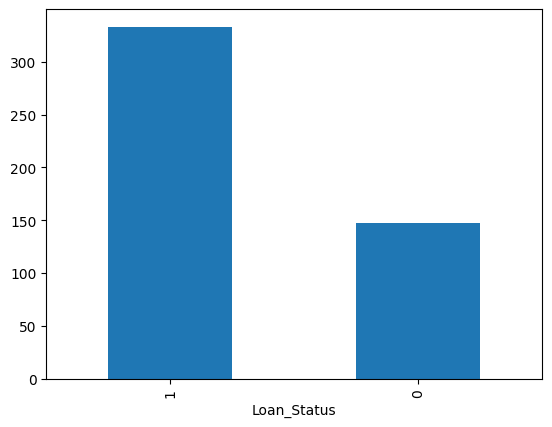

In [25]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.savefig('result.png')

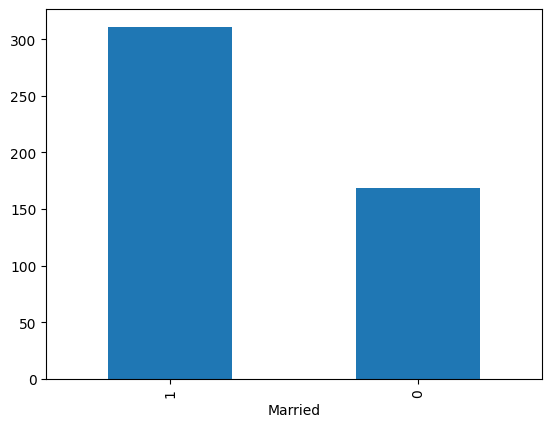

In [24]:
df['Married'].value_counts().plot(kind='bar')
plt.savefig('result.png')

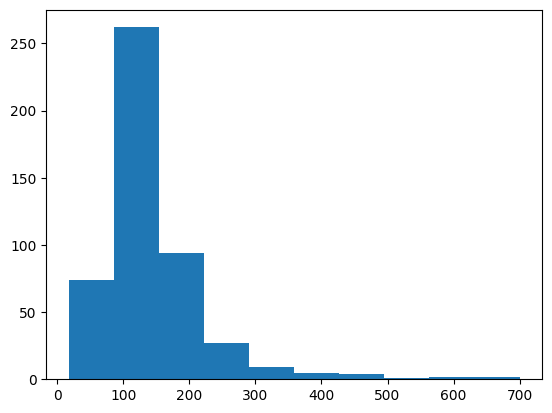

In [27]:
plt.hist(df['LoanAmount'])
plt.show()

In [33]:
model = sm.GLM(df['Loan_Status'], df['LoanAmount'], family=families.Binomial()).fit()

In [34]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      479
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.91
Date:                Fri, 17 Nov 2023   Deviance:                       619.82
Time:                        17:30:05   Pearson chi2:                     495.
No. Iterations:                     4   Pseudo R-squ. (CS):           -0.06095
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LoanAmount     0.0040      0.001      6.310      0.0

In [35]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['Odds Ratio'])

In [36]:
print(model_odds)

            Odds Ratio
LoanAmount    1.004036


In [45]:
X = df[['Married','Education','LoanAmount']]

In [46]:
vif_data = pd.DataFrame()

In [47]:
vif_data['feature'] = X.columns

In [48]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [49]:
print(vif_data)

      feature       VIF
0     Married  2.294270
1   Education  1.181951
2  LoanAmount  2.183028


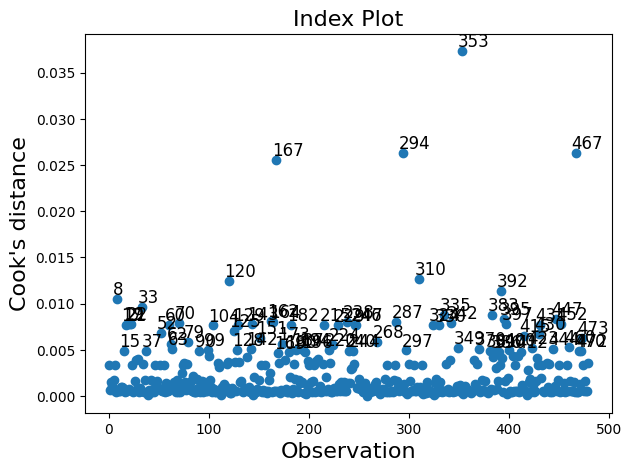

In [50]:
model_all = sm.GLM(df['Loan_Status'], df[['Married','Education','LoanAmount']], family=families.Binomial()).fit()
infl = model_all.get_influence()
fig = infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())
fig.tight_layout(pad=1.0)